In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import tensorflow as tf
import cufflinks as cf

In [2]:
cf.go_offline()

In [3]:
df = pd.read_csv('diabetes-dataset.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


C:\Users\Muskan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

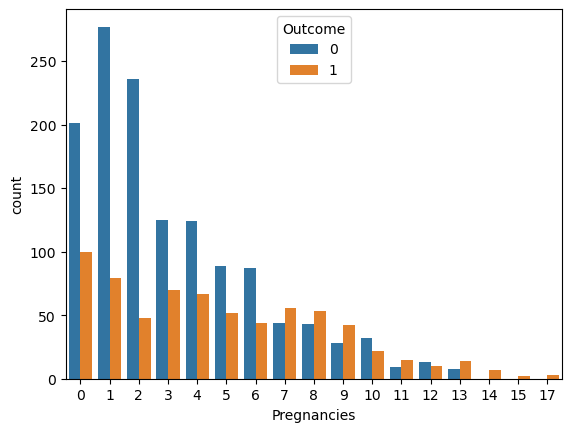

In [8]:
sns.countplot(df['Pregnancies'], hue = df['Outcome'])

C:\Users\Muskan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Insulin', ylabel='Density'>

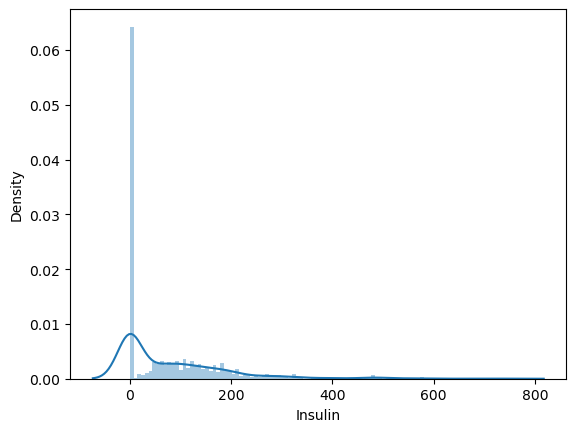

In [9]:
sns.distplot(df['Insulin'],bins=100)

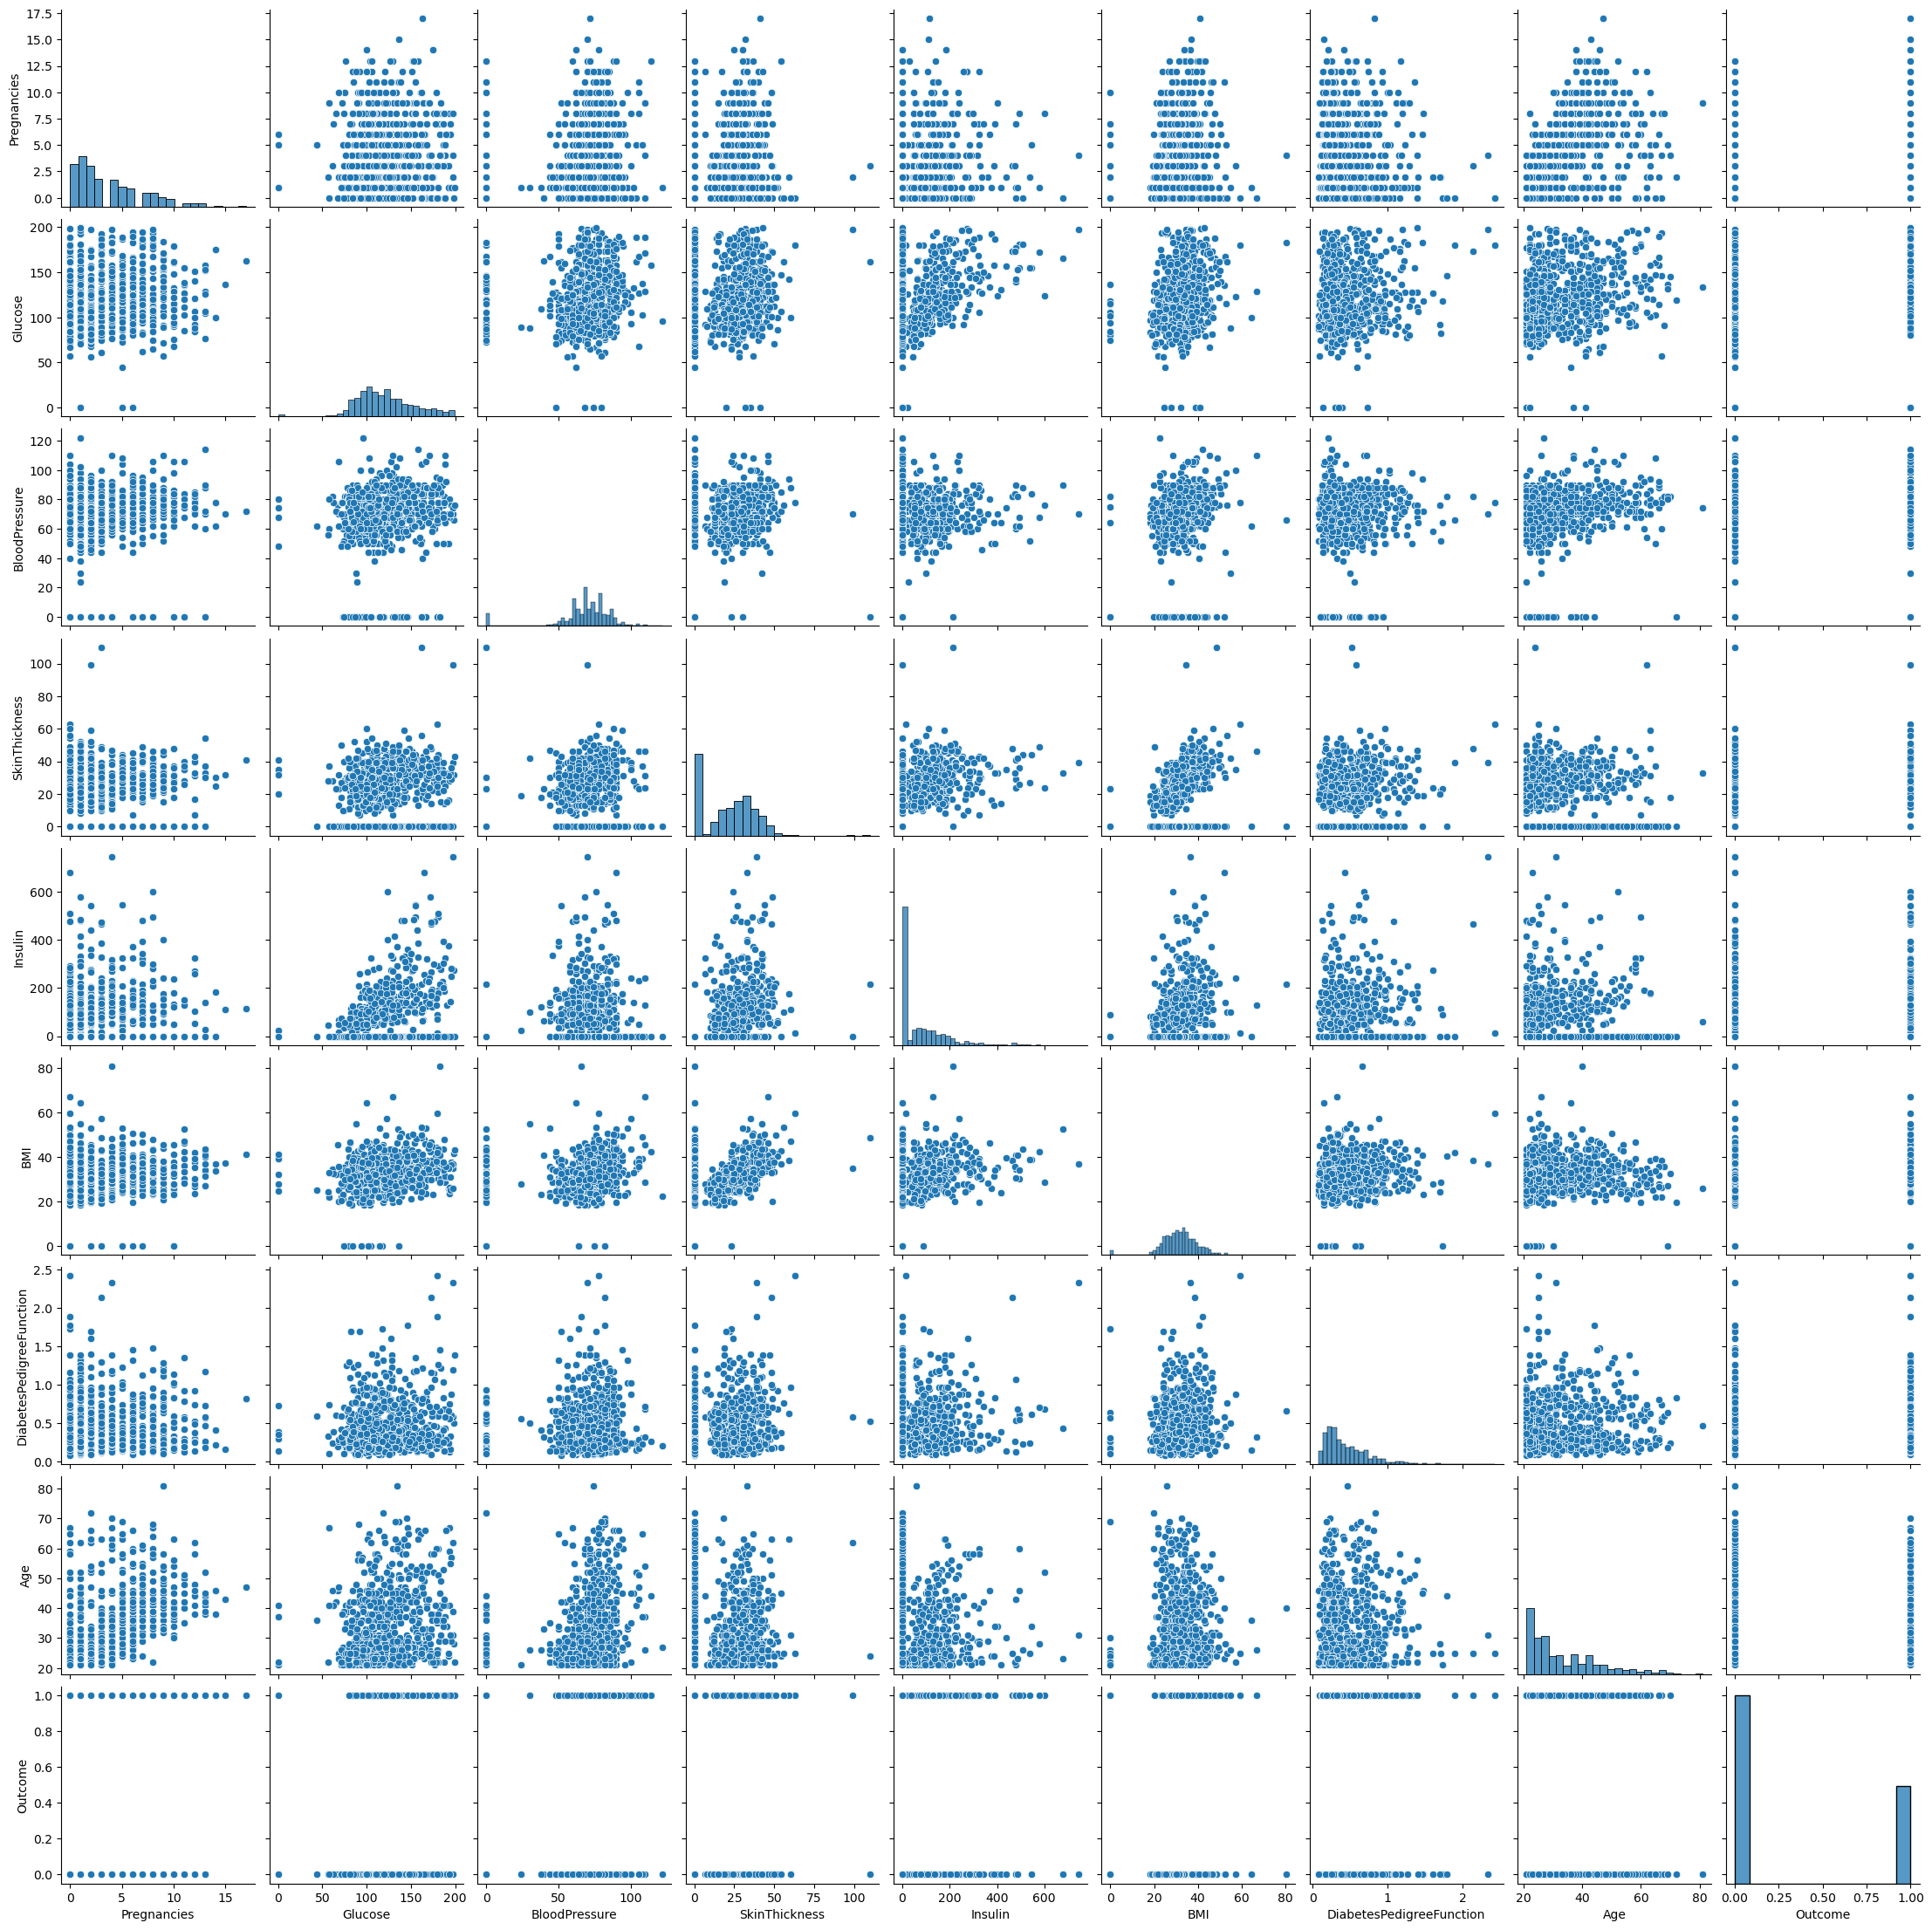

In [10]:
sns.pairplot(df)

<AxesSubplot:xlabel='Outcome', ylabel='Pregnancies'>

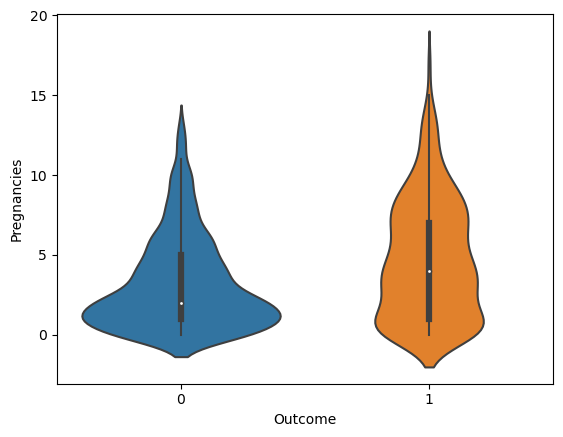

In [11]:
sns.violinplot(x= df['Outcome'], y= df['Pregnancies'])

<AxesSubplot:xlabel='Age', ylabel='Count'>

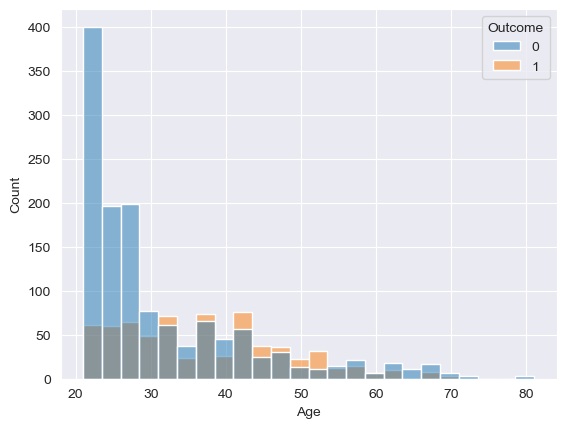

In [12]:
sns.set_style(style = 'darkgrid')
sns.histplot(x=df['Age'], hue = df['Outcome'])

In [13]:
(df['Age'].where(df['Outcome']==1).value_counts())/(df['Age'].value_counts())*100

21.0      7.228916
22.0     16.145833
23.0     17.475728
24.0     18.032787
25.0     28.358209
26.0     21.428571
27.0     25.925926
28.0     25.510204
29.0     44.285714
30.0     32.142857
31.0     56.896552
32.0     48.387097
33.0     53.488372
34.0     26.470588
35.0     55.555556
36.0     63.043478
37.0     33.333333
38.0     62.222222
39.0     25.000000
40.0     48.571429
41.0     54.901961
42.0     39.583333
43.0     85.294118
44.0     70.000000
45.0     54.761905
46.0     60.000000
47.0     70.588235
48.0     21.428571
49.0     57.142857
50.0     66.666667
51.0     53.846154
52.0     89.473684
53.0     70.000000
54.0     58.333333
55.0     35.714286
56.0     57.142857
57.0     28.571429
58.0     38.095238
59.0     50.000000
60.0     57.142857
61.0     60.000000
62.0     50.000000
63.0     15.384615
64.0           NaN
65.0           NaN
66.0     41.666667
67.0     30.000000
68.0           NaN
69.0           NaN
70.0    100.000000
72.0           NaN
81.0           NaN
Name: Age, d

In [14]:
diabetetic = (df['Age'].where(df['Outcome']==1).value_counts())

In [15]:
diabetetic

25.0    38
31.0    33
29.0    31
22.0    31
36.0    29
43.0    29
38.0    28
41.0    28
28.0    25
45.0    23
33.0    23
24.0    22
46.0    21
27.0    21
42.0    19
26.0    18
23.0    18
30.0    18
52.0    17
40.0    17
37.0    16
35.0    15
32.0    15
44.0    14
50.0    14
21.0    12
47.0    12
34.0     9
39.0     9
49.0     8
58.0     8
51.0     7
53.0     7
54.0     7
55.0     5
62.0     5
66.0     5
56.0     4
60.0     4
61.0     3
59.0     3
67.0     3
70.0     3
48.0     3
57.0     2
63.0     2
Name: Age, dtype: int64

In [16]:
total = (df['Age'].value_counts()).sort_values()

In [17]:
total

68      3
64      3
70      3
81      3
72      3
61      5
59      6
69      6
56      7
60      7
57      7
65      8
62     10
67     10
53     10
54     12
66     12
51     13
63     13
55     14
49     14
48     14
47     17
52     19
44     20
58     21
50     21
35     27
32     31
43     34
34     34
46     35
40     35
39     36
45     42
33     43
38     45
36     46
42     48
37     48
41     51
30     56
31     58
29     70
27     81
26     84
28     98
23    103
24    122
25    134
21    166
22    192
Name: Age, dtype: int64

In [18]:
X= df.drop(['Outcome'],axis=1)

In [19]:
y = df['Outcome']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()

In [24]:
X_train = scaler.fit_transform(X_train)

In [25]:
X_test = scaler.transform(X_test)

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
model = LogisticRegression()

In [28]:
model.fit(X_train,y_train)

LogisticRegression()

In [29]:
pred = model.predict(X_test)

In [30]:
from sklearn.metrics import confusion_matrix , classification_report

In [31]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[346  49]
 [ 87 118]]
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       395
           1       0.71      0.58      0.63       205

    accuracy                           0.77       600
   macro avg       0.75      0.73      0.74       600
weighted avg       0.77      0.77      0.77       600



In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout

In [33]:
X_train.shape

(1400, 8)

In [34]:
X_test.shape

(600, 8)

In [35]:
model_seq = Sequential()
model_seq.add(Dense(8, activation='relu'))
model_seq.add(Dropout(0.1))
model_seq.add(Dense(1, activation = 'sigmoid'))

model_seq.compile(optimizer='adam', loss= 'binary_crossentropy')

In [36]:
model_seq.fit(X_train,y_train, validation_data=(X_test,y_test),epochs=100, verbose =1, batch_size = 64)

Epoch 1/100
22/22 [==============================] - 1s 14ms/step - loss: 0.9798 - val_loss: 0.9181
Epoch 2/100
22/22 [==============================] - 0s 5ms/step - loss: 0.8921 - val_loss: 0.8503
Epoch 3/100
22/22 [==============================] - 0s 4ms/step - loss: 0.8344 - val_loss: 0.7895
Epoch 4/100
22/22 [==============================] - 0s 4ms/step - loss: 0.7757 - val_loss: 0.7381
Epoch 5/100
22/22 [==============================] - 0s 3ms/step - loss: 0.7382 - val_loss: 0.6944
Epoch 6/100
22/22 [==============================] - 0s 4ms/step - loss: 0.6897 - val_loss: 0.6578
Epoch 7/100
22/22 [==============================] - 0s 5ms/step - loss: 0.6512 - val_loss: 0.6284
Epoch 8/100
22/22 [==============================] - 0s 3ms/step - loss: 0.6214 - val_loss: 0.6052
Epoch 9/100
22/22 [==============================] - 0s 4ms/step - loss: 0.6032 - val_loss: 0.5858
Epoch 10/100
22/22 [==============================] - 0s 3ms/step - loss: 0.5868 - val_loss: 0.5698
Epoch 11

22/22 [==============================] - 0s 3ms/step - loss: 0.4552 - val_loss: 0.4613
Epoch 84/100
22/22 [==============================] - 0s 3ms/step - loss: 0.4602 - val_loss: 0.4613
Epoch 85/100
22/22 [==============================] - 0s 4ms/step - loss: 0.4542 - val_loss: 0.4616
Epoch 86/100
22/22 [==============================] - 0s 3ms/step - loss: 0.4529 - val_loss: 0.4616
Epoch 87/100
22/22 [==============================] - 0s 4ms/step - loss: 0.4494 - val_loss: 0.4614
Epoch 88/100
22/22 [==============================] - 0s 3ms/step - loss: 0.4495 - val_loss: 0.4613
Epoch 89/100
22/22 [==============================] - 0s 3ms/step - loss: 0.4536 - val_loss: 0.4611
Epoch 90/100
22/22 [==============================] - 0s 3ms/step - loss: 0.4417 - val_loss: 0.4613
Epoch 91/100
22/22 [==============================] - 0s 3ms/step - loss: 0.4514 - val_loss: 0.4613
Epoch 92/100
22/22 [==============================] - 0s 3ms/step - loss: 0.4526 - val_loss: 0.4611
Epoch 93/100


In [37]:
losses = pd.DataFrame(model_seq.history.history)

<AxesSubplot:>

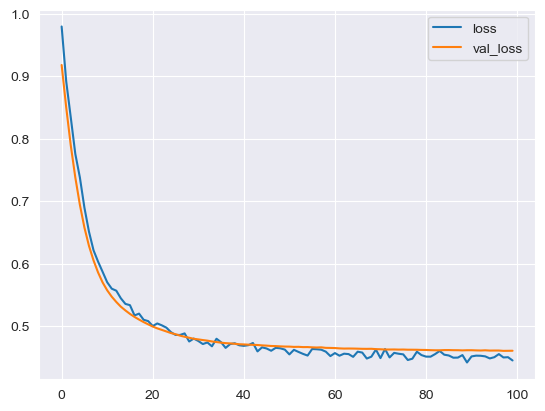

In [38]:
losses.plot()

In [39]:
pred_seq = (model_seq.predict(X_test)>0.5)*1

19/19 [==============================] - 0s 2ms/step


In [40]:
print(classification_report(y_test,pred_seq))
print(confusion_matrix(y_test,pred_seq))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       395
           1       0.69      0.62      0.65       205

    accuracy                           0.77       600
   macro avg       0.75      0.74      0.74       600
weighted avg       0.77      0.77      0.77       600

[[337  58]
 [ 78 127]]


In [ ]:
# Random Forest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
rfc = RandomForestClassifier(n_estimators=300)

In [43]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300)

In [44]:
predictions_rfc = rfc.predict(X_test)

In [45]:
print(confusion_matrix(y_test,predictions_rfc))
print(classification_report(y_test,predictions_rfc))

[[380  15]
 [ 17 188]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       395
           1       0.93      0.92      0.92       205

    accuracy                           0.95       600
   macro avg       0.94      0.94      0.94       600
weighted avg       0.95      0.95      0.95       600

